# Zadanie 1 - Wizualizacja danych

## Potrzebne paczki

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from typing import *

## Importowanie danych

In [2]:
def read_csv(filename: str) -> pd.DataFrame:
  return pd.read_csv(f'resources/lab-1/datasets/{filename}.csv')

filenames: Tuple[str] = ('rsel', 'cel-rs', '2cel-rs', 'cel', '2cel')
titles: Tuple[str] = ('1-Evol-RS', '1-Coev-RS', '2-Coev-RS', '1-Coev', '2-Coev')
data: Dict[str, pd.DataFrame] = dict(zip(titles, map(read_csv, filenames)))

## Struktura Danych

In [3]:
data['1-Coev-RS']

,generation,effort,run-52,run-9,run-35,run-0,run-12,run-8,run-20,run-22,...,run-50,run-1,run-10,run-7,run-40,run-4,run-39,run-5,run-24,run-23
0,0,2500,0.6271,0.6662,0.6267,0.5834,0.7036,0.5881,0.7135,0.6781,...,0.5915,0.5327,0.6137,0.6373,0.6258,0.6815,0.6795,0.6285,0.6519,0.6611
1,1,5000,0.6271,0.6662,0.7325,0.7086,0.7036,0.6676,0.7135,0.6729,...,0.6552,0.5434,0.6445,0.6498,0.5543,0.6968,0.6795,0.6878,0.6923,0.6914
2,2,7500,0.6555,0.6169,0.6289,0.6857,0.6891,0.5666,0.6782,0.7139,...,0.6813,0.6332,0.6584,0.6191,0.6253,0.6968,0.6885,0.7213,0.6377,0.5928
3,3,10000,0.6555,0.6770,0.5734,0.7306,0.6854,0.6113,0.6782,0.6557,...,0.6592,0.6268,0.6974,0.6333,0.5933,0.6815,0.6026,0.7539,0.6908,0.6187
4,4,12500,0.6755,0.6191,0.6777,0.7228,0.6861,0.6356,0.6363,0.7507,...,0.6681,0.6254,0.6974,0.7186,0.6025,0.6393,0.6812,0.7539,0.6941,0.6187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,195,490000,0.9701,0.9939,0.9455,0.9586,0.9758,0.9553,0.9784,0.9939,...,0.8311,0.9955,0.8010,0.9820,0.9817,0.9939,0.9817,0.9939,0.9939,0.9879
196,196,492500,0.9645,0.9939,0.9507,0.9625,0.9758,0.9404,0.9813,0.9939,...,0.8484,0.9955,0.8130,0.9616,0.9803,0.9939,0.9911,0.9939,0.9939,0.9939
197,197,495000,0.9754,0.9939,0.9373,0.9578,0.9828,0.8873,0.9712,0.9939,...,0.7954,0.9955,0.7962,0.9616,0.9697,0.9939,0.9667,0.9939,0.9939,0.9939
198,198,497500,0.9645,0.9939,0.8564,0.9491,0.9770,0.8873,0.9715,0.9939,...,0.8407,0.9955,0.8080,0.9720,0.9795,0.9939,0.9910,0.9939,0.9939,0.9912


## Uśrednianie danych

In [4]:
run_columns = list(set(data['1-Coev'].columns) - {'effort', 'generation', 'average'})
for df in map(lambda x: data[x], titles):
  df['average'] = df[run_columns].mean(axis=1)

## Przedstawienie danych

C:\Users\HOUOUI~1\AppData\Local\Temp/ipykernel_18800/3499745517.py:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_xticklabels(range(0, 501, 100))
C:\Users\HOUOUI~1\AppData\Local\Temp/ipykernel_18800/3499745517.py:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_yticklabels(range(60, 101, 5))
C:\Users\HOUOUI~1\AppData\Local\Temp/ipykernel_18800/3499745517.py:62: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_yticklabels(range(60, 101, 5))


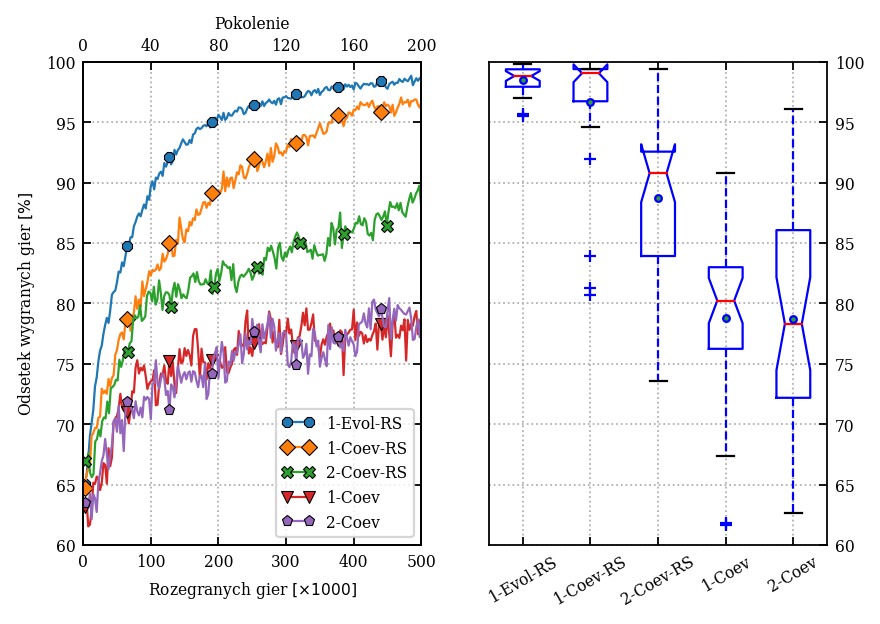

In [5]:
markers = dict(zip(titles, '8DXvp'))
colors = dict(zip(titles, ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple']))

def plots():
  plt.rcParams.update({
    "font.family": "serif",
    'font.sans-serif': 'Computer Modern Sans Serif',
    'font.monospace': 'Computer Modern Typewriter',
    'font.size': 7,
  })
  (axis_1, axis_2) = plt.subplots(1, 2, dpi=160)[1]
  axis_1.grid(True, linestyle=":")
  axis_2.grid(True, linestyle=":")
  return (axis_1, axis_2)

def plot_generations(axis: plt.Axes):
  def add_top_generations_label(twin_axis: plt.Axes):
    twin_axis.set_xlabel('Pokolenie')
    twin_axis.tick_params(axis='x', direction='in')
    twin_axis.set_xticks(np.arange(0, 201, step=40))
    twin_axis.set_xticklabels(np.arange(0, 201, step=40))
  def add_markers():
    def show_marked_line():
      (x, y) = data[title]['effort'], data[title]['average']
      axis.plot(x, y, lw=1, ls='-', marker=markers[title], mew=0.5, mec='black', ms=5, markevery=25)
    for (title) in titles: show_marked_line()
    axis.legend(titles, numpoints=2)
  def manage_ticks():
    axis.tick_params(axis='x', direction='in')
    axis.tick_params(axis='y', direction='in', right=True)
    axis.set_xticklabels(range(0, 501, 100))
    axis.set_yticklabels(range(60, 101, 5))
  def manage_labels():
    axis.set_xlim(0, 500_000)
    axis.set_ylim(0.6, 1)
    axis.set_xlabel('Rozegranych gier $\\left[\\times 1000\\right]$')
    axis.set_ylabel('Odsetek wygranych gier $\\left[\\%\\right]$')

  add_top_generations_label(axis.twiny())
  add_markers()
  manage_ticks()
  manage_labels()

def plot_weights(axis: plt.Axes):
  def plot_boxes():
    axis.boxplot(
      [data[title][run_columns].iloc[-1] for title in titles],
      notch=True,
      labels=titles,
      showmeans=True,
      whiskerprops={'linestyle': '--', 'color': 'b'},
      boxprops={'c': 'b'},
      medianprops={'c': 'r'},
      meanprops={'marker': 'o', 'mec': 'b', 'ms': 3},
      flierprops={'marker': '+', 'mec': 'b', 'ms': 5})
  def manage_ticks():
    axis.tick_params(labelleft=False, left=False, top=True, right=True, labelright=True)
    axis.tick_params('x', direction='in', labelrotation=30)
    axis.tick_params('y', direction='in')
  def manage_labels():
    axis.set_ylim(0.6, 1)
    axis.set_yticklabels(range(60, 101, 5))

  manage_ticks()
  manage_labels()
  plot_boxes()

(generations, weights) = plots()
plot_generations(generations)
plot_weights(weights)

plt.savefig('figure.pdf')
plt.show()
